# Polynomial Regression
1. Used when there is no linear Relationship.
2. Used when there is Heteroskedasticity.
3. Absence of Normal Distribution for Residuals.
4. Multicolinearity within Features

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings ("ignore")

In [2]:
df=pd.read_csv("advertising1.csv")
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [4]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


Here in the above dataset there is no variance for TV & Radio features.

But for Newspaper there is Variance in data,skewness is present on right side.

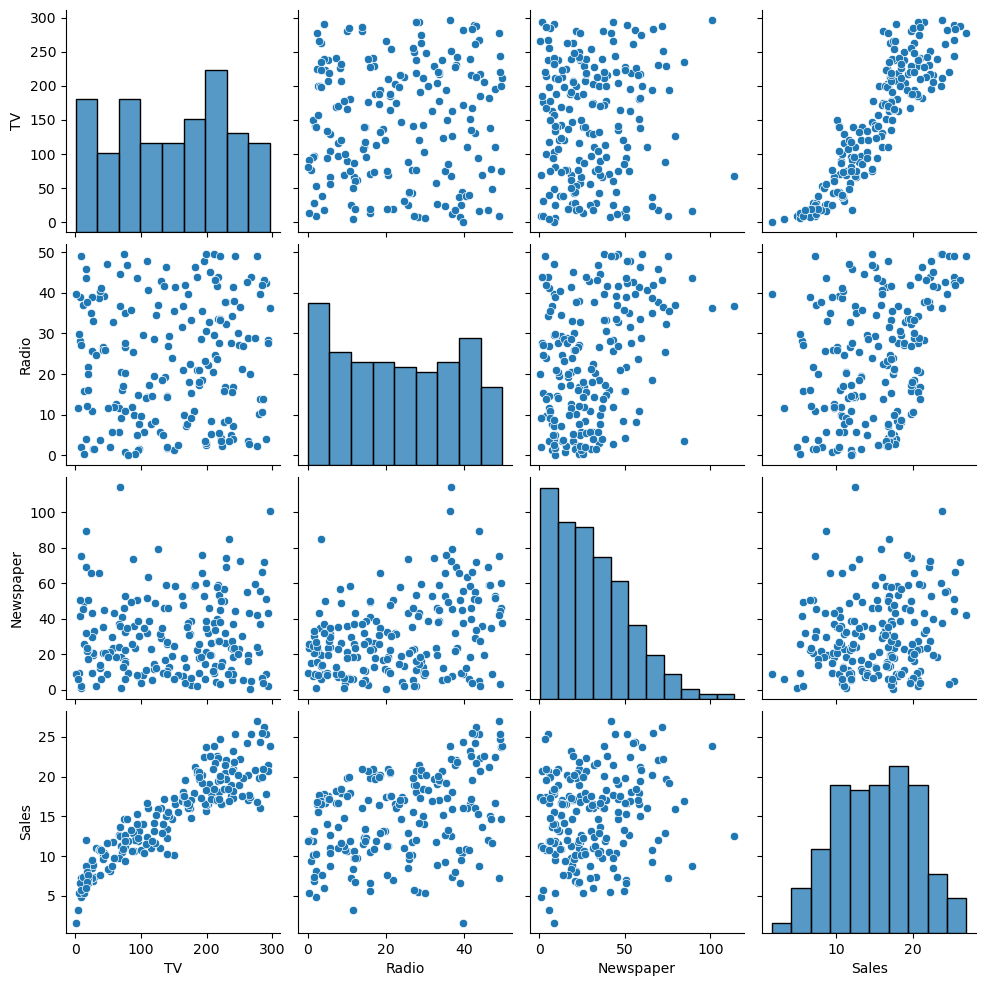

In [5]:
sns.pairplot(df)

There is Good relationship in between sales and TV.

Some relationship is also there in Sales and Radio.

But no relationship is present in sales and Newspaper. 


In [6]:
sns.pairplot(data=df,x_vars=["TV","Newspaper","Radio"],y_vars="Sales",height=4,aspect=1,kind="scatter")

 output can be seen in google colab also.

In [7]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


In [8]:
df.corr().style.background_gradient()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


Newspaper and Radio has co-relation so there is multicolinearity is present.

Sales is y

Other is x

In [9]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [10]:
x=df.iloc[:,:-1]
x.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [11]:
y=df.iloc[:,-1]
y.head()

0    22.1
1    10.4
2    12.0
3    16.5
4    17.9
Name: Sales, dtype: float64


# Linear Model 

In [12]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=1)

In [13]:
from sklearn.linear_model import LinearRegression 
linreg=LinearRegression()
linreg.fit(xtrain,ytrain)
ypred=linreg.predict(xtest)

In [14]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
mae=mean_absolute_error(ytest,ypred)
mse=mean_squared_error(ytest,ypred)
rmse=np.sqrt(mse)
r2=r2_score(ytest,ypred)

print(f"MAE:{mae}\n MSE:{mse}\n RMSE:{rmse}\n Accuracy:{r2}")

MAE:1.1947417134056735
 MSE:2.370659971225657
 RMSE:1.5396947656031235
 Accuracy:0.9071151423684273


In [15]:
linreg.coef_

array([ 0.05502392,  0.10251003, -0.00150711])

This are values of slopes (m)

In [16]:
pd.DataFrame(linreg.coef_,index=x.columns,columns=["coefficients"])

,coefficients
TV,0.055024
Radio,0.102510
Newspaper,-0.001507


We can say that strength of Newspaper feature is very less.

In [18]:
linreg.intercept_

4.661439720130817

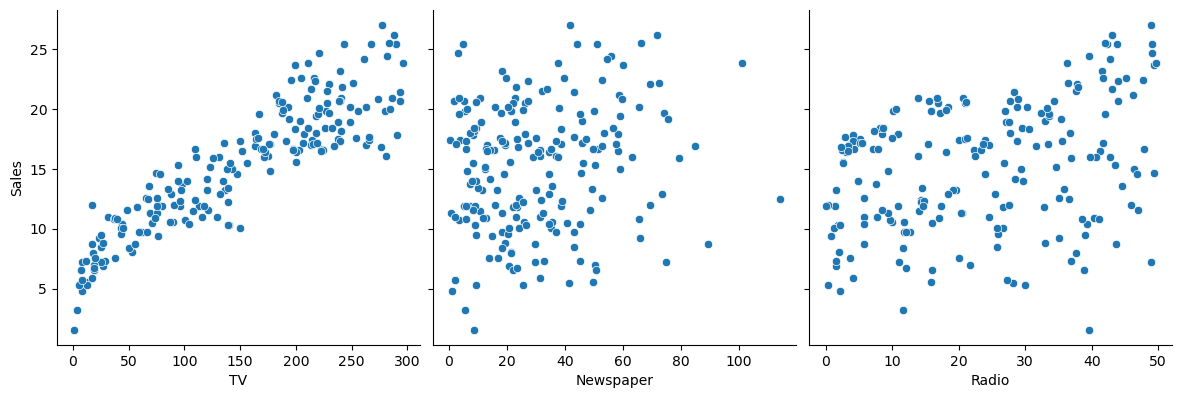

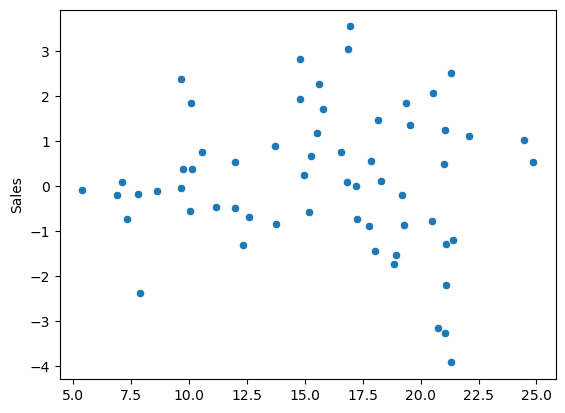

In [19]:
residual=ytest-ypred
plt.figure()
sns.scatterplot(ypred,residual)
plt.show()

X & Y are not linear in nature.

X & Y have Heteroskedasticity.

Absence of Normal Distribution for Residuals. 

There is also multicolinearity is present. (Newspaper and Radio has co-relation)

In [20]:
sns.distplot(residual)

<AxesSubplot:xlabel='Sales', ylabel='Density'>

Here we can remove the multicolinearity by removing Newspaper column.

But it is not going to have much diffrence since the strength of that column is very less.

In [21]:
x=df.iloc[:,:-2]
x.head()

,TV,Radio
0,230.1,37.8
1,44.5,39.3
2,17.2,45.9
3,151.5,41.3
4,180.8,10.8


# Rerun the Linear Model after removing Multicolinearity

In [22]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=1)

In [23]:
from sklearn.linear_model import LinearRegression 
linreg=LinearRegression()
linreg.fit(xtrain,ytrain)
ypred=linreg.predict(xtest)

In [24]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
mae=mean_absolute_error(ytest,ypred)
mse=mean_squared_error(ytest,ypred)
rmse=np.sqrt(mse)
r2=r2_score(ytest,ypred)

print(f"MAE:{mae}\n MSE:{mse}\n RMSE:{rmse}\n Accuracy:{r2}")

MAE:1.1919753277836755
 MSE:2.3645069433762353
 RMSE:1.5376953350310443
 Accuracy:0.9073562242286407


There is not much change in Accuaracy.

# Polynomial Regression

In [25]:
from sklearn.preprocessing import PolynomialFeatures
pf=PolynomialFeatures(degree=2)
xtrainp=pf.fit_transform(xtrain)
xtestp=pf.transform(xtest)

In [26]:
from sklearn.linear_model import LinearRegression
linreg=LinearRegression()
linreg.fit(xtrainp,ytrain)
ypred=linreg.predict(xtestp)

In [27]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
mae=mean_absolute_error(ytest,ypred)
mse=mean_squared_error(ytest,ypred)
rmse=np.sqrt(mse)
r2=r2_score(ytest,ypred)

print(f"MAE:{mae}\n MSE:{mse}\n RMSE:{rmse}\n Accuracy:{r2}")

MAE:0.9476471686238772
 MSE:1.4561026730447497
 RMSE:1.2066907942985021
 Accuracy:0.9429484231714647


Accuracy has been increased from 92% to 94%


# Hyperparameter Tunning

we can change the value of degree.

degree=3

In [28]:
from sklearn.preprocessing import PolynomialFeatures
pf=PolynomialFeatures(degree=3)
xtrainp=pf.fit_transform(xtrain)
xtestp=pf.transform(xtest)

from sklearn.linear_model import LinearRegression
linreg=LinearRegression()
linreg.fit(xtrainp,ytrain)
ypred=linreg.predict(xtestp)

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
mae=mean_absolute_error(ytest,ypred)
mse=mean_squared_error(ytest,ypred)
rmse=np.sqrt(mse)
r2=r2_score(ytest,ypred)

print(f"MAE:{mae}\n MSE:{mse}\n RMSE:{rmse}\n Accuracy:{r2}")

MAE:0.8951304696178415
 MSE:1.3855834898368022
 RMSE:1.177108104566782
 Accuracy:0.9457114361602816


degree=5

In [30]:
from sklearn.preprocessing import PolynomialFeatures
pf=PolynomialFeatures(degree=5)
xtrainp=pf.fit_transform(xtrain)
xtestp=pf.transform(xtest)

from sklearn.linear_model import LinearRegression
linreg=LinearRegression()
linreg.fit(xtrainp,ytrain)
ypred=linreg.predict(xtestp)

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
mae=mean_absolute_error(ytest,ypred)
mse=mean_squared_error(ytest,ypred)
rmse=np.sqrt(mse)
r2=r2_score(ytest,ypred)

print(f"MAE:{mae}\n MSE:{mse}\n RMSE:{rmse}\n Accuracy:{r2}")

MAE:0.8049354011193431
 MSE:1.1086034033543808
 RMSE:1.0529023712359948
 Accuracy:0.9565637963519456


degree=6

In [32]:
from sklearn.preprocessing import PolynomialFeatures
pf=PolynomialFeatures(degree=6)
xtrainp=pf.fit_transform(xtrain)
xtestp=pf.transform(xtest)

from sklearn.linear_model import LinearRegression
linreg=LinearRegression()
linreg.fit(xtrainp,ytrain)
ypred=linreg.predict(xtestp)

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
mae=mean_absolute_error(ytest,ypred)
mse=mean_squared_error(ytest,ypred)
rmse=np.sqrt(mse)
r2=r2_score(ytest,ypred)

print(f"MAE:{mae}\n MSE:{mse}\n RMSE:{rmse}\n Accuracy:{r2}")

MAE:0.9480345832003103
 MSE:1.3591277999355524
 RMSE:1.1658163663011223
 Accuracy:0.9467479968732683


At degree=6 Accuracy is reduced so the 

Model is best fit when degree=6